In [1]:
from hapi import *
from pylab import *
import matplotlib.pyplot as plt

HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

In [2]:
# HITRAN 数据库设置
db_begin("C:\\Users\\RS\\Documents\\Hitran")  # 设置数据文件夹的路径

Using C:\Users\RS\Documents\Hitran

CH4
                     Lines parsed: 93978
CO2
                     Lines parsed: 45600
H2O
                     Lines parsed: 25435


In [3]:
# 加载分子数据
fetch('CO2', 2, 1, 4000, 6666)  # 二氧化碳, 分子标签2，同位素标签1，波数范围6200-7200 cm^-1
fetch('CH4', 6, 1, 4000, 6666)  # 甲烷, 分子标签6，同位素标签1，波数范围6200-7200 cm^-1
fetch('H2O', 1, 1, 4000, 6666)  # 水蒸气, 分子标签1，同位素标签1，波数范围6200-7200 cm^-1


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2.data
  65536 bytes written to C:\Users\RS\Documents\Hitran/CO2

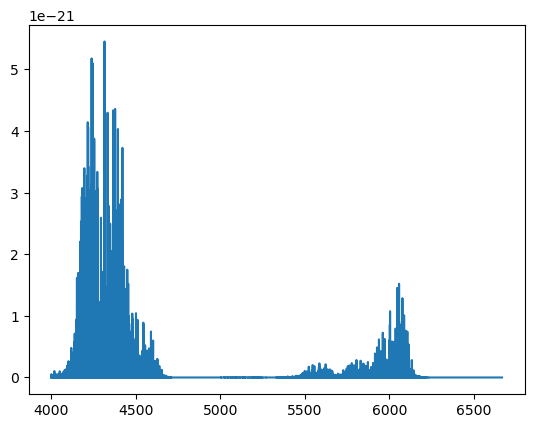

In [4]:
x,y = getStickXY('CH4')
plot(x, y); plt.show()

{'self': 1.0}
21.598035 seconds elapsed for abscoef; nlines = 45600
{'self': 1.0}
44.330928 seconds elapsed for abscoef; nlines = 93978
{'self': 1.0}
12.366950 seconds elapsed for abscoef; nlines = 25435


Text(0.5, 1.0, 'H2O k(w): p=1 atm, T=296K')

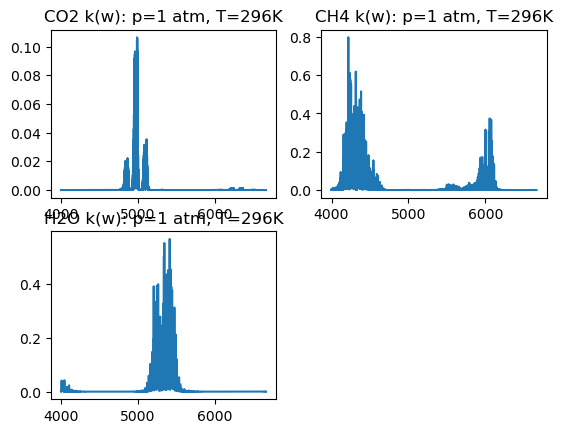

In [5]:

# 设置条件
T = 296  # 温度, K
P = 1  # 压力, atm
L = 1000000    # 光程长度, cm

nu1, coef_CO2 = absorptionCoefficient_Voigt(SourceTables='CO2', OmegaStep = 0.01,Environment={'T': T, 'p': P}, HITRAN_units=False, GammaL='gamma_self')
nu2, coef_CH4 = absorptionCoefficient_Voigt(SourceTables='CH4',OmegaStep = 0.01, Environment={'T': T, 'p': P}, HITRAN_units=False, GammaL='gamma_self')
nu3, coef_H2O = absorptionCoefficient_Voigt(SourceTables='H2O', OmegaStep = 0.01,Environment={'T': T, 'p': P}, HITRAN_units=False, GammaL='gamma_self')
subplot(2,2,1); plot(nu1,coef_CO2); title('CO2 k(w): p=1 atm, T=296K')
subplot(2,2,2); plot(nu2,coef_CH4); title('CH4 k(w): p=1 atm, T=296K')
subplot(2,2,3); plot(nu3,coef_H2O); title('H2O k(w): p=1 atm, T=296K')


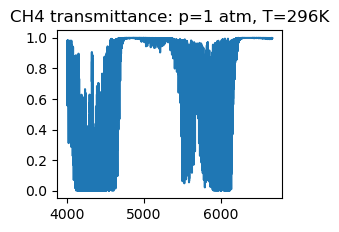

In [6]:
nu2, CH4_transm = transmittanceSpectrum(nu2,coef_CH4,Environment={'l':100.})
nu3, H2O_transm = transmittanceSpectrum(nu3,coef_H2O,Environment={'l':100.})
subplot(2,2,4); plot(nu2,CH4_transm); title('CH4 transmittance: p=1 atm, T=296K')
show()